In [83]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format
r
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [84]:
# load the csv file
df_compensation = pd.read_csv('~/Desktop/New folder (3)/Day 01/Life_Expectancy.csv')

# display first five observations using head()
df_compensation.head()
# type your code here

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [85]:
s = pd.get_dummies(r)
S = sm.add_constant(s)
S = s.drop('Expected',axis = 1)
S

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developed,Status_Developing
0,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,0,1
1,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,0,1
2,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,0,1
3,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,0,1
4,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,0,1
5,118,1,94,33,54.900000,1,96,94,0.100000,369.654776,291695,2.100000,2.200000,0.741000,12.700000,0,1
6,59,1,93,74,66.600000,1,93,93,0.100000,56554.387600,23789338,0.600000,0.600000,0.937000,20.400000,1,0
7,65,0,93,309,57.600000,0,93,93,0.100000,43665.947000,8633169,1.900000,2.100000,0.892000,15.900000,1,0
8,118,5,96,0,52.500000,6,98,96,0.100000,55.313820,9649341,2.800000,2.900000,0.758000,12.700000,0,1
9,69,0,98,0,63.600000,0,98,98,0.100000,22688.878240,1378188,6.200000,6.100000,0.823000,14.500000,0,1


In [86]:
sc = StandardScaler()

In [87]:
df_s = sc.fit_transform(S)


In [88]:
df_s

array([[ 1.01125414,  0.36569388, -0.96867308, ..., -1.03036985,
        -0.42538498,  0.42538498],
       [-1.50395516, -0.29411709,  0.62130295, ...,  0.38464914,
        -0.42538498,  0.42538498],
       [-1.39545594, -0.07063273,  0.47675967, ...,  0.45367446,
        -0.42538498,  0.42538498],
       ...,
       [-1.10941253,  0.01450417,  0.52494077, ..., -1.89318631,
        -0.42538498,  0.42538498],
       [ 2.51051615,  0.03578839,  0.13949203, ..., -2.03123694,
        -0.42538498,  0.42538498],
       [ 2.73737817,  0.05707262, -0.00505124, ..., -2.0657496 ,
        -0.42538498,  0.42538498]])

In [89]:
df = pd.DataFrame(df_s,columns = S.columns)
df


,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developed,Status_Developing
0,1.011254,0.365694,-0.968673,-0.147121,-1.072655,0.379464,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,3.198683,3.080864,-1.262918,-1.030370,-0.425385,0.425385
1,-1.503955,-0.294117,0.621303,-0.247722,0.732965,-0.294020,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.732305,-0.732496,0.419497,0.384649,-0.425385,0.425385
2,-1.395456,-0.070633,0.476760,-0.242230,0.841965,-0.105116,0.387784,0.371773,-0.409423,-0.252190,0.496193,0.446991,0.340012,0.312109,0.453674,-0.425385,0.425385
3,1.721431,0.408262,-1.016854,-0.237436,-0.873611,0.502662,-3.692740,-1.255898,0.615052,-0.292496,-0.411834,1.012071,0.912016,-0.952685,-0.581705,-0.425385,0.425385
4,-0.438690,-0.208980,0.428579,-0.247722,0.998358,-0.228314,0.295045,0.319267,-0.409423,0.608814,0.583022,-0.781442,-0.827830,0.807288,1.454542,-0.425385,0.425385
5,-0.418963,-0.283475,0.428579,-0.244846,0.623964,-0.294020,0.434154,0.319267,-0.409423,-0.599299,-0.472905,-0.511187,-0.517994,0.300177,-0.133041,-0.425385,0.425385
6,-1.000913,-0.283475,0.380397,-0.241271,1.178446,-0.294020,0.295045,0.266762,-0.409423,4.583190,0.102427,-0.879717,-0.899330,1.469515,2.524434,2.350812,-2.350812
7,-0.941732,-0.294117,0.380397,-0.220785,0.751921,-0.302233,0.295045,0.266762,-0.409423,3.394358,-0.268667,-0.560324,-0.541828,1.201044,0.971364,2.350812,-2.350812
8,-0.418963,-0.240907,0.524941,-0.247722,0.510224,-0.252954,0.526893,0.424279,-0.409423,-0.628294,-0.243786,-0.339206,-0.351160,0.401599,-0.133041,-0.425385,0.425385
9,-0.902278,-0.294117,0.621303,-0.247722,1.036271,-0.302233,0.526893,0.529290,-0.409423,1.459430,-0.446302,0.496129,0.411512,0.789390,0.488187,-0.425385,0.425385


In [14]:
df.columns

Index(['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ', ' BMI ',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela', 'Country_Viet Nam', 'Country_Yemen',
       'Country_Zambia', 'Country_Zimbabwe', 'Status_Developed',
       'Status_Developing'],
      dtype='object', length=142)

In [15]:
# type your code here
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df['Adult_Mortality'], df['Expected'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_s', X_train_s.shape)
print('y_train_s', y_train_s.shape)

# print dimension of test set
print('X_test_s', X_test_s.shape)
print('y_test_s', y_test_s.shape)


X_train_s (86,)
y_train_s (86,)
X_test_s (38,)
y_test_s (38,)


In [16]:
X_train_s = pd.DataFrame(X_train_s)

c = np.ones(X_train_s.shape[0])
X_train_s.insert(loc = 0, column = 'intercept', value = c)


In [17]:
X_train_s.head()

,intercept,Adult_Mortality
10,1.000000,-0.310464
112,1.000000,0.774529
32,1.000000,-0.675416
82,1.000000,-0.981186
38,1.000000,-0.409099


In [18]:
models  = sm.OLS(y_train_s,X_train_s).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           1.15e-19
Time:                        14:23:42   Log-Likelihood:                -80.652
No. Observations:                  86   AIC:                             165.3
Df Residuals:                      84   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.0651      0.068      0.963      0.338      -0.069       0.200
Adult_Mortality    -0.8133      0.068    -11.877      0.000      -0.950      -0.677
==============================================================================
Omnibus:                       55.463   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.534
Skew:                          -2.115   Prob(JB):                     9.55e-48
Kurtosis:                       9.521   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# type your code here
# type your code here
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df['Income_Index'], df['Expected'], 
                                                    random_state=1, test_size = 0.3)
X_train_s = pd.DataFrame(X_train_s)

c = np.ones(X_train_s.shape[0])
X_train_s.insert(loc = 0, column = 'intercept', value = c)
X_train_s



,intercept,Income_Index
10,1.000000,-0.690181
112,1.000000,-1.286782
32,1.000000,0.491089
82,1.000000,1.517243
38,1.000000,1.028030
19,1.000000,0.377735
123,1.000000,-2.139921
27,1.000000,0.258415
36,1.000000,-0.016022
56,1.000000,1.368093


In [20]:
mode = sm.OLS(y_train_s,X_train_s).fit()
mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.62e-24
Time:                        14:23:43   Log-Likelihood:                -69.770
No. Observations:                  86   AIC:                             143.5
Df Residuals:                      84   BIC:                             148.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0067      0.059      0.114      0.910      -0.111       0.125
Income_Index     0.8615      0.060     14.348      0.000       0.742       0.981
==============================================================================
Omnibus:                       12.971   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               31.974
Skew:                           0.378   Prob(JB):                     1.14e-07
Kurtosis:                       5.890   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
mode_predict = mode.predict(X_train_s)


In [22]:
mode_predict.head()

10    -0.587830
112   -1.101793
32     0.429815
82     1.313830
38     0.892381
dtype: float64

In [23]:
ssr = np.sum((mode_predict - y_train_s.mean())**2)
ssr

62.519723102552504

In [24]:
sse = np.sum((y_train_s - mode_predict)**2)
sse

25.50920721177272

In [25]:
sst = np.sum((y_train_s - y_train_s.mean())**2)

sst

88.02893031432531

In [36]:

# type your code here
x = df_compensation.iloc[:,[4,8,9]]
c = np.ones(x.shape[0])
x.insert(loc =0,column = 'intercept', value = c)
x

,intercept,Hepatitis,Polio,Diphtheria
0,1.000000,65,6,65
1,1.000000,98,98,98
2,1.000000,95,95,95
3,1.000000,64,7,64
4,1.000000,94,93,94
5,1.000000,94,96,94
6,1.000000,93,93,93
7,1.000000,93,93,93
8,1.000000,96,98,96
9,1.000000,98,98,98


In [41]:
y = df_compensation['Expected']
z = df['Expected']

In [39]:
modell = sm.OLS(y,x).fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           0.000468
Time:                        14:54:23   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# type your code here
x = df.iloc[:,[2,3,6,-1,-2]]
d = np.ones(x.shape[0])
x.insert(loc =0,column = 'intercept', value = d)
x

,intercept,Hepatitis,Measles,Polio,Status_Developing,Status_Developed
0,1.000000,-0.968673,-0.147121,-3.739110,0.425385,-0.425385
1,1.000000,0.621303,-0.247722,0.526893,0.425385,-0.425385
2,1.000000,0.476760,-0.242230,0.387784,0.425385,-0.425385
3,1.000000,-1.016854,-0.237436,-3.692740,0.425385,-0.425385
4,1.000000,0.428579,-0.247722,0.295045,0.425385,-0.425385
5,1.000000,0.428579,-0.244846,0.434154,0.425385,-0.425385
6,1.000000,0.380397,-0.241271,0.295045,-2.350812,2.350812
7,1.000000,0.380397,-0.220785,0.295045,-2.350812,2.350812
8,1.000000,0.524941,-0.247722,0.526893,0.425385,-0.425385
9,1.000000,0.621303,-0.247722,0.526893,0.425385,-0.425385


In [48]:
enc = pd.get_dummies(data = df_compensation['Status'],drop_first = True, prefix = 'Status')
x = df_compensation.iloc[:,[4,8,9]]
X = pd.concat([x,enc],axis = 1)
X = sm.add_constant(X)


In [45]:

y = df_compensation['Expected']

y

0     65.000000
1     77.500000
2     75.600000
3     52.400000
4     76.300000
5     74.800000
6     82.800000
7     81.500000
8     72.700000
9     76.900000
10    71.800000
11    75.500000
12    72.300000
13    81.100000
14    71.000000
15    60.000000
16    69.800000
17    77.400000
18    65.700000
19    75.000000
20    77.700000
21    74.500000
22    68.700000
23    82.200000
24    52.500000
25    53.100000
26    85.000000
27    76.100000
28    74.800000
29    63.500000
30    79.600000
31    78.000000
32    79.100000
33    85.000000
34    86.000000
35    76.200000
36    79.000000
37    73.500000
38    77.600000
39    64.800000
40    69.900000
41    81.100000
42    82.400000
43    74.400000
44    81.000000
45    62.400000
46    81.000000
47    71.900000
48    59.000000
49    63.500000
50    75.800000
51    82.700000
52    68.300000
53    69.100000
54    75.500000
55    68.900000
56    81.400000
57    82.500000
58    82.700000
59    76.200000
60    83.700000
61    72.000000
62    63

In [50]:
mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.00e-09
Time:                        15:36:06   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# type your code heres

mod = sm.OLS(y,df).fit()
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.135
Method:                 Least Squares   F-statistic:                            0.08013
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                        1.00
Time:                        10:11:46   Log-Likelihood:                         -705.04
No. Observations:                 124   AIC:                                      1442.
Df Residuals:                     108   BIC:                                      1487.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -2.3373      8.886     -0.263      0.793     -19.950      15.276
Infant_Deaths          5.2231     74.903      0.070      0.945    -143.248     153.695
Hepatitis              1.3606     14.299      0.095      0.924     -26.982      29.703
Measles               -0.6802     15.100     -0.045      0.964     -30.610      29.250
 BMI                  -0.5609     10.284     -0.055      0.957     -20.945      19.823
Underfive_Deaths      -4.7413     71.219     -0.067      0.947    -145.910     136.427
Polio                 -0.1971     10.210     -0.019      0.985     -20.436      20.042
Diphtheria            -0.6577     16.374     -0.040      0.968     -33.114      31.799
 HIV                  -1.8247     10.162     -0.180      0.858     -21.968      18.318
GDP                    0.5444      8.144      0.067      0.947     -15.598      16.687
Population            -0.7535      7.587     -0.099      0.921     -15.793      14.286
Malnourished10_19     -1.9741     26.409     -0.075      0.941     -54.321      50.373
Malnourished5_9        1.2515     25.676      0.049      0.961     -49.643      52.146
Income_Index           3.1263     22.868      0.137      0.892     -42.203      48.455
Schooling              1.0427     21.670      0.048      0.962     -41.911      43.996
Status_Developed       0.3667      4.547      0.081      0.936      -8.646       9.380
Status_Developing     -0.3667      4.547     -0.081      0.936      -9.380       8.646
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     1.52e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
dfs = df.iloc[:,[0,1]]
fd = sm.add_constant(dfs)
fd
dfs
mo = sm.OLS(y,fd).fit()
mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     64.05
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.07e-19
Time:                        10:16:54   Log-Likelihood:                -395.58
No. Observations:                 124   AIC:                             797.2
Df Residuals:                     121   BIC:                             805.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              71.2210      0.534    133.284      0.000      70.163      72.279
Adult_Mortality    -5.8539      0.543    -10.786      0.000      -6.928      -4.779
Infant_Deaths      -0.8091      0.543     -1.491      0.139      -1.884       0.265
==============================================================================
Omnibus:                       58.294   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.967
Skew:                          -1.837   Prob(JB):                     1.51e-36
Kurtosis:                       7.293   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
ds = s.iloc[:,[0,1]]

dsf = sm.add_constant(ds)
modelll = sm.OLS(y,dsf).fit()
modelll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     64.05
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.07e-19
Time:                        10:35:26   Log-Likelihood:                -395.58
No. Observations:                 124   AIC:                             797.2
Df Residuals:                     121   BIC:                             805.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7248      1.001     80.684      0.000      78.744      82.706
Adult_Mortality    -0.0577      0.005    -10.786      0.000      -0.068      -0.047
Infant_Deaths      -0.0086      0.006     -1.491      0.139      -0.020       0.003
==============================================================================
Omnibus:                       58.294   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.967
Skew:                          -1.837   Prob(JB):                     1.51e-36
Kurtosis:                       7.293   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# type your code here
x= df_compensation.iloc[:,[10,14]]
da = sm.add_constant(x)
da
y = df_compensation['Expected']
mlr_ = sm.OLS(y,da).fit()
pred = mlr_.predict(da)
ssr = np.sum((pred - y.mean())**2)
print('ssr', ssr)
sse = np.sum((y- pred)**2)
print('sse', sse)
print('sst',(sse +ssr))


ssr 4829.204158161018
sse 3990.6013257099457
sst 8819.805483870965


In [133]:
# type your code here
d = df_compensation.iloc[:,[15]]
s = sm.add_constant(d)
y = df_compensation['Expected']
slr = sm.OLS(y,s).fit()
print(slr.summary())
print(slr.conf_int())


                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.13e-34
Time:                        11:01:54   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [134]:
df_compensation.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [137]:
# type your code here
x = df_compensation.iloc[:,[2,3,7]]
x = sm.add_constant(x)
y = df_compensation['Expected']
mlr =sm.OLS(y,x).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.29e-19
Time:                        11:14:39   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
x = df_compensation.iloc[:,[2,3,7,12]]
x = sm.add_constant(x)
y = df_compensation['Expected']
mlr =sm.OLS(y,x).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           8.93e-19
Time:                        11:16:20   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.019     78.813      0.000      78.289      82.325
Adult_Mortality      -0.0550      0.006     -9.929      0.000      -0.066      -0.044
Infant_Deaths         0.0886      0.050      1.788      0.076      -0.010       0.187
Underfive_Deaths     -0.0760      0.038     -1.975      0.051      -0.152       0.000
Population         4.736e-09   1.31e-08      0.361      0.718   -2.12e-08    3.07e-08
==============================================================================
Omnibus:                       54.418   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.042
Skew:                          -1.738   Prob(JB):                     8.69e-32
Kurtosis:                       6.949   Cond. No.                     8.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
# type your code here
df = df_compensation.drop(['Country','Expected'],axis = 1)
x = df.iloc[:,1:17]

encode = pd.get_dummies(data = df['Status'],drop_first = True,prefix = 'Status')
x = pd.concat([pd.DataFrame(x),encode],axis =1)
x = sm.add_constant(x)



y = df_compensation['Expected']
mlr = sm.OLS(y,x).fit()
mlr.summary()
print(mlr.f_pvalue)


1.9430668554847794e-36


In [165]:
stat,p_value = shapiro(mlr.resid)
print(stat)
print(p_value)


0.9769425392150879
0.03209252282977104


In [167]:
x['interaction'] = x['Status_Developing']*x['GDP']
y= df_compensation['Expected']
mlr = sm.OLS(y,x).fit()
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.14e-36
Time:                        12:26:57   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.5466      3.925     15.935      0.000      54.765      70.328
Adult_Mortality       -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths          0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis              0.0715      0.032      2.259      0.026       0.009       0.134
Measles            -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
 BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths      -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                 -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria            -0.0446      0.040     -1.124      0.264      -0.123       0.034
 HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP                -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population         -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19     -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9        0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index          15.9884      6.392      2.501      0.014       3.315      28.662
Schooling              0.4188      0.343      1.220      0.225      -0.262       1.099
Status_Developing     -3.8250      1.489     -2.569      0.012      -6.777      -0.873
interaction            0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [214]:
# type your code here
df_num = df_.select_dtypes(include = np.number).drop(['FEV'],axis = 1)
df_cat = df_.select_dtypes(include = 'object')
dum = pd.get_dummies(df_cat,drop_first = True )
df_m = sm.add_constant(df_num)
y = df_['FEV']
mlr = sm.OLS(y,df_m).fit()
mlr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1068.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          2.71e-206
Time:                        14:11:14   Log-Likelihood:                -358.68
No. Observations:                 654   AIC:                             723.4
Df Residuals:                     651   BIC:                             736.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6105      0.224    -20.558      0.000      -5.051      -4.170
Age            0.0543      0.009      5.961      0.000       0.036       0.072
Height         0.1097      0.005     23.263      0.000       0.100       0.119
==============================================================================
Omnibus:                       32.399   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.675
Skew:                           0.271   Prob(JB):                     4.50e-16
Kurtosis:                       4.516   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
df_f = df_.drop(['FEV'],axis = 1)
df_f = sm.add_constant(df_m)
y = df_['FEV']
# mls = sm.OLS(y,df_m).fit()
# mls.summary()
# ml = sm.OLS(y,df_m).fit()
df_f.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   654 non-null    float64
 1   Age     654 non-null    int64  
 2   Height  654 non-null    float64
 3   Gender  654 non-null    object 
 4   Smoke   654 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 25.7+ KB


In [243]:
# type your code here
df_n = df_l.drop(['FEV'],axis = 1)
df_n = sm.add_constant(df_n)
y = df_l['FEV']
ml = sm.OLS(y,df_n).fit()
ml.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          9.10e-209
Time:                        14:35:56   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# type your code here
df_n['inter'] = df_n['Smoke']*df_n['Gender']
x = sm.add_constant(df_n)
y = df_l['FEV']
md = sm.OLS(y,x).fit()
md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     376.6
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          2.67e-207
Time:                        14:40:46   Log-Likelihood:                -342.91
No. Observations:                 654   AIC:                             699.8
Df Residuals:                     647   BIC:                             731.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3593      0.229    -19.028      0.000      -4.809      -3.909
Age            0.0709      0.010      6.858      0.000       0.051       0.091
Height         0.1019      0.005     20.406      0.000       0.092       0.112
Gender         0.1373      0.035      3.961      0.000       0.069       0.205
Smoke          0.1835      0.321      0.571      0.568      -0.447       0.814
intersect     -0.0284      0.024     -1.172      0.241      -0.076       0.019
inter          0.2543      0.111      2.293      0.022       0.037       0.472
==============================================================================
Omnibus:                       21.952   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.082
Skew:                           0.171   Prob(JB):                     2.68e-10
Kurtosis:                       4.225   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

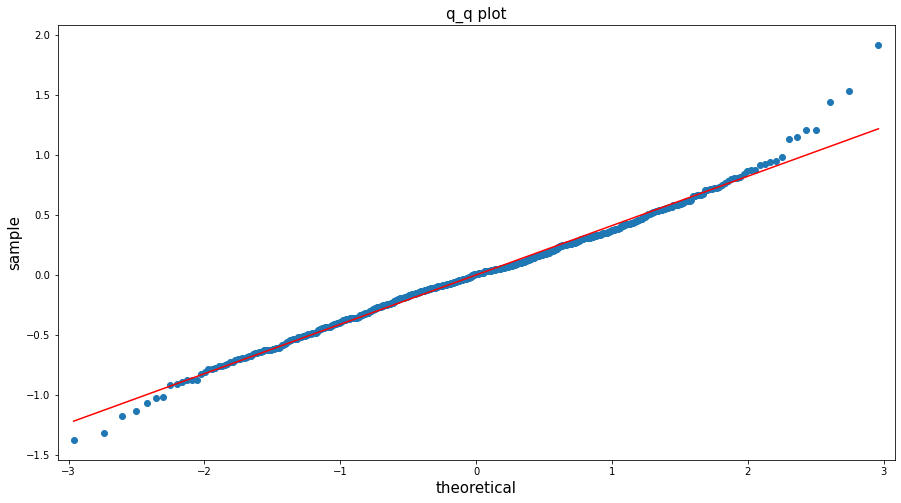

In [249]:
x = pd.concat([df_num, dum],axis = 1)
y = df_l['FEV']
mlr = sm.OLS(y,sm.add_constant(x)).fit()
plt.rcParams['figure.figsize'] = (15,8)
qqplot(mlr.resid,line = 'r')
plt.title('q_q plot',fontsize = 15)
plt.xlabel('theoretical',fontsize =15)
plt.ylabel('sample',fontsize = 15)
plt.show()

In [259]:
# type your code here 
df_n = df_l.drop(['FEV'],axis = 1)
df_n = sm.add_constant(df_n)
y = df_l['FEV']
ml = sm.OLS(y,df_n).fit()
pred  = ml.predict(df_n)
mse = round(mean_squared_error(y,pred),4)
print(mse)
rmse = round(np.sqrt(mse),4)
print(rmse)
print(df_['FEV'].describe())
ml.summary()


0.1686
0.4106
count   654.000000
mean      2.636780
std       0.867059
min       0.791000
25%       1.981000
50%       2.547500
75%       3.118500
max       5.793000
Name: FEV, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          9.10e-209
Time:                        16:35:44   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
# type your code here
pred  = ml.predict(df_n)
mse = round(mean_absolute_error(y,pred),4)
print(mse)
rmse = round(np.sqrt(mse)*100/df_n.shape[1],4)
print(rmse)


0.313
11.1893


In [262]:
# type your code here
df_n = df_l.drop(['FEV'],axis = 1)
df_n = sm.add_constant(df_n)
y = df_l['FEV']
ml = sm.OLS(y,df_n).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          9.10e-209
Time:                        22:08:15   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""